# Pandas.

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [102]:
%pylab inline  
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Данные можно скачать [здесь](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [103]:
pass_data = pd.read_csv('data.csv')
pass_data.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [104]:
print('Количество строк в таблице:', len(pass_data))
print('Столбцы:', ', '.join(list(pass_data.columns)))

Количество строк в таблице: 4622
Столбцы: order_id, quantity, item_name, choice_description, item_price


### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [105]:
print('В выборку попало', pass_data.order_id.nunique(), 'заказа')

В выборку попало 1834 заказа


In [106]:
print('Было куплено', pass_data.item_name.nunique() ,'уникальных категорий товара')

Было куплено 50 уникальных категорий товара


### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

In [107]:
if pass_data.isnull().sum().sum() > 0:
    print('Пропуски в данных есть')
    for k, v in dict(pass_data.isnull().sum()).items():
        if v > 0:
            print(k)
else:
    print('Пропусков в данных нет')

Пропуски в данных есть
choice_description


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [108]:
pass_data_new = pass_data.copy(deep=True) 
for i in pass_data_new.columns:
    if (pass_data_new[i].dtype == int64) or (pass_data_new[i].dtype == float64):
        pass_data_new[i].fillna(value = 0, inplace = True)
    if pass_data_new[i].dtype == object:
        pass_data_new[i].fillna(value = '', inplace = True)
pass_data_new

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [110]:
print ('Тип колонки с ценой товара:', pass_data_new['item_price'].dtype)

Тип колонки с ценой товара: object


In [111]:
def change(item):
    item_new = item.replace('$', '')
    return float(item_new)

pass_data_new['new_price'] = pass_data_new['item_price'].apply(change)
pass_data_new

,order_id,quantity,item_name,choice_description,item_price,new_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


Какая средняя, минимальная, максимальная цена у товара? 

In [113]:
pass_data_new['new_price_for_one'] = pass_data_new['new_price'] / pass_data_new['quantity']
pass_data_new

,order_id,quantity,item_name,choice_description,item_price,new_price,new_price_for_one
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,8.49
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75,8.75


In [115]:
mean_price = pass_data_new.groupby(['item_name']).mean()
mean_price.new_price_for_one

item_name
6 Pack Soft Drink                         6.490000
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.087273
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.431667
Bowl                                      7.400000
Burrito                                   7.400000
Canned Soda                               1.090000
Canned Soft Drink                         1.250000
Carnitas Bowl                            10.315588
Carnitas Burrito                          9.975932
Carnitas Crispy Tacos                     9.852857
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                              9.657727
Chicken Burrito                           9.475949
Chicken Crispy Tacos 

In [116]:
max_price = pass_data_new.groupby(['item_name']).max()
max_price.new_price_for_one

item_name
6 Pack Soft Drink                         6.49
Barbacoa Bowl                            11.75
Barbacoa Burrito                         11.75
Barbacoa Crispy Tacos                    11.75
Barbacoa Salad Bowl                      11.89
Barbacoa Soft Tacos                      11.75
Bottled Water                             1.50
Bowl                                      7.40
Burrito                                   7.40
Canned Soda                               1.09
Canned Soft Drink                         1.25
Carnitas Bowl                            11.75
Carnitas Burrito                         11.75
Carnitas Crispy Tacos                    11.75
Carnitas Salad                            8.99
Carnitas Salad Bowl                      11.89
Carnitas Soft Tacos                      11.75
Chicken Bowl                             11.25
Chicken Burrito                          11.25
Chicken Crispy Tacos                     11.25
Chicken Salad                            10.98
Chi

In [117]:
min_price = pass_data_new.groupby(['item_name']).min()
min_price.new_price_for_one

item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

Удалите старую колонку с ценой.

In [118]:
pass_data_new1 = pass_data_new.drop(columns = ['item_price'])
pass_data_new1

,order_id,quantity,item_name,choice_description,new_price,new_price_for_one
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [119]:
name = pass_data_new1.sort_values('new_price_for_one')
name

,order_id,quantity,item_name,choice_description,new_price,new_price_for_one
3364,1349,2,Canned Soda,[Coca Cola],2.18,1.09
818,338,3,Bottled Water,,3.27,1.09
1182,485,2,Bottled Water,,2.18,1.09
162,73,2,Canned Soda,[Diet Coke],2.18,1.09
821,338,1,Canned Soda,[Coca Cola],1.09,1.09
...,...,...,...,...,...,...
4239,1692,1,Carnitas Salad Bowl,"[Tomatillo Green Chili Salsa, [Black Beans, Ch...",11.89,11.89
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89,11.89
2439,969,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.89,11.89
2442,970,1,Barbacoa Salad Bowl,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.89,11.89


In [120]:
name_cheap = name.drop_duplicates(keep = 'first', subset=['item_name'])
name_expensive = name.drop_duplicates(keep = 'last', subset=['item_name'])

In [121]:
print('Самые дешевые 5 товаров:', ', '.join(list(name_cheap.item_name.head(5))))
print('Самые дорогие 5 товаров:', ', '.join(list(name_expensive.item_name.tail(5))))

Самые дешевые 5 товаров: Canned Soda, Bottled Water, Canned Soft Drink, Side of Chips, Chips
Самые дорогие 5 товаров: Steak Burrito, Carnitas Burrito, Carnitas Salad Bowl, Barbacoa Salad Bowl, Steak Salad Bowl


### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [122]:
print('Клиенты покупали больше 1 Chicken Bowl', len(pass_data_new1[(pass_data['item_name'] == 'Chicken Bowl') & (pass_data['quantity'] > 1)]), 'раза')

Клиенты покупали больше 1 Chicken Bowl 33 раза


### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [123]:
print('Средний чек:', pass_data_new1.groupby(['order_id'])['new_price'].sum().mean())

Средний чек у заказа: 18.81142857142869


In [124]:
print('В среднем среди заказов товаров покупают:', pass_data_new1.groupby(['order_id'])['quantity'].sum().mean())

В среднем среди заказов товаров покупают: 2.711014176663032


### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [125]:
tovar = pass_data_new1.groupby(['order_id']).sum()
print(len(tovar[(tovar['quantity'] == 1)]),'заказов содержали ровно 1 товар')

56 заказов содержали ровно 1 товар


### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [126]:
popular_tovar = pass_data_new1.groupby(['item_name'])['quantity'].sum().sort_values()
print('Самая популярная категория товара:', *popular_tovar.tail(1).keys())

Самая популярная категория товара: Chicken Bowl


### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [127]:
burrito = pass_data_new1[(pass_data_new1['item_name'].str.contains('Burrito'))]
burrito

,order_id,quantity,item_name,choice_description,new_price,new_price_for_one
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",8.49,8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.49,8.49
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99,8.99
...,...,...,...,...,...,...
4608,1829,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25,11.25
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25,11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75


In [128]:
print('Виды Буррито:', ', '.join(list(burrito.item_name.unique())))

Виды Буррито: Steak Burrito, Chicken Burrito, Barbacoa Burrito, Carnitas Burrito, Veggie Burrito, Burrito


In [129]:
popular_burrito = burrito.groupby(['item_name'])['quantity'].sum().sort_values()
print('Чаще всего покупают:', *popular_burrito.tail(1).keys())

Чаще всего покупают: Chicken Burrito


In [130]:
expensive_burrito = burrito.sort_values('new_price_for_one').drop_duplicates(keep = 'last', subset=['item_name']).groupby(['item_name'])['new_price_for_one'].max()
expensive_burrito = expensive_burrito[expensive_burrito==expensive_burrito.max()].keys()
print('Самые дорогие:', ', '.join(list(expensive_burrito)))

Самые дорогие: Barbacoa Burrito, Carnitas Burrito, Steak Burrito


### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [131]:
kol = 0
cost = list(pass_data_new1.groupby(['order_id'])['new_price'].sum())
cost_max = list(pass_data_new1.groupby(['order_id'])['new_price_for_one'].max())
for i in range(len(cost)):
    if cost_max[i] > 0.4 * cost[i]:
        kol = kol + 1
print('В', kol, 'заказах есть товар, стоящий более 40% от суммы всего чека')

В 1589 заказах есть товар, стоящий более 40% от суммы всего чека


### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблице и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [132]:
cola = pass_data_new1[(pass_data_new1['choice_description'].str.contains('Diet Coke')) & (pass_data_new1['new_price_for_one'] == 1.25)]
cola

,order_id,quantity,item_name,choice_description,new_price,new_price_for_one
368,159,1,Canned Soft Drink,[Diet Coke],1.25,1.25
492,206,2,Canned Soft Drink,[Diet Coke],2.50,1.25
513,215,1,Canned Soft Drink,[Diet Coke],1.25,1.25
541,225,1,Canned Soft Drink,[Diet Coke],1.25,1.25
566,233,1,Canned Soft Drink,[Diet Coke],1.25,1.25
...,...,...,...,...,...,...
4513,1794,1,Canned Soft Drink,[Diet Coke],1.25,1.25
4545,1806,1,Canned Soft Drink,[Diet Coke],1.25,1.25
4571,1817,1,Canned Soft Drink,[Diet Coke],1.25,1.25
4585,1823,1,Canned Soft Drink,[Diet Coke],1.25,1.25


In [133]:
percent = ((sum(np.array(cola['quantity']) * 1.35) - sum(np.array(cola['new_price']))) / sum(np.array(cola['new_price']))) * 100
print ('На', percent, 'процентов')

На 7.9999999999999805 процентов


### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [134]:
matrix = pd.DataFrame(np.random.rand(10,3))
matrix = matrix.rename(columns={0: "index", 1: "column1", 2: "column2"})
matrix = matrix.set_index('index')
matrix

,column1,column2
index,,
0.952780,0.863800,0.908739
0.307386,0.113682,0.494022
0.372438,0.136259,0.962937
0.329461,0.312675,0.865050
0.356799,0.720156,0.824029
0.451423,0.717012,0.064034
0.738519,0.525679,0.247512
0.657623,0.256823,0.211576
0.316498,0.822256,0.268857


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [146]:
matrix.to_csv('Maxtrix_new.csv', index=False, header=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [136]:
%matplotlib inline 
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [137]:
df = pass_data_new1

In [138]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]
df['date'] = df.order_id.map(dates['date'])

df

,order_id,quantity,item_name,choice_description,new_price,new_price_for_one,date
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39,2018-01-09
1,1,1,Izze,[Clementine],3.39,3.39,2018-01-09
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,2018-01-09
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39,2018-01-09
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,2018-01-14
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75,2018-01-03
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75,2018-01-03
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25,2018-01-01
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75,2018-01-01


### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

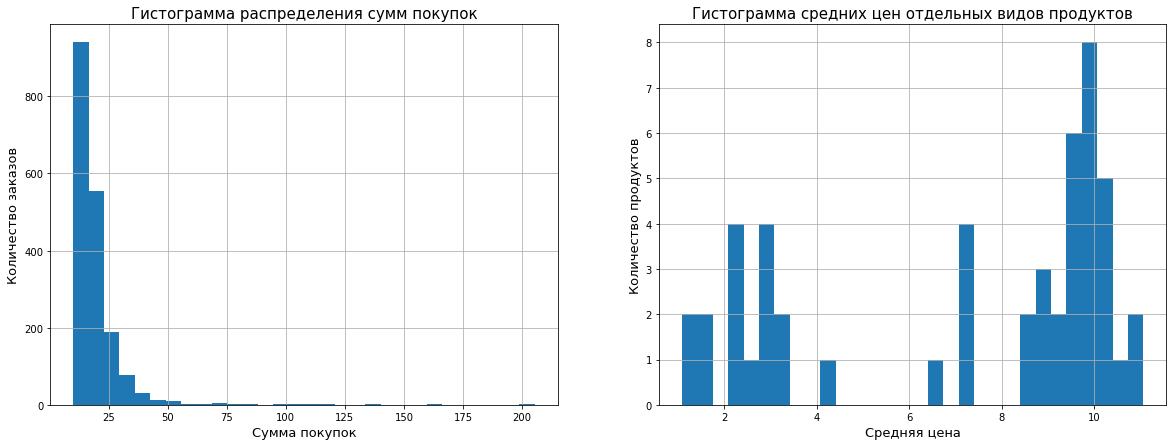

In [139]:
g1 = df.groupby(['order_id'])['new_price'].sum()
g2 = df.groupby(['item_name'])['new_price_for_one'].mean()

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].hist(g1, bins = 30)
ax[0].set_xlabel('Сумма покупок', fontsize = 13)
ax[0].set_ylabel('Количество заказов', fontsize = 13)
ax[0].set_title('Гистограмма распределения сумм покупок', fontsize = 15)
ax[0].grid()


ax[1].hist(g2, bins = 30)
ax[1].set_xlabel('Средняя цена', fontsize = 13)
ax[1].set_ylabel('Количество продуктов', fontsize = 13)
ax[1].set_title('Гистограмма средних цен отдельных видов продуктов', fontsize = 15)
ax[1].grid()

### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

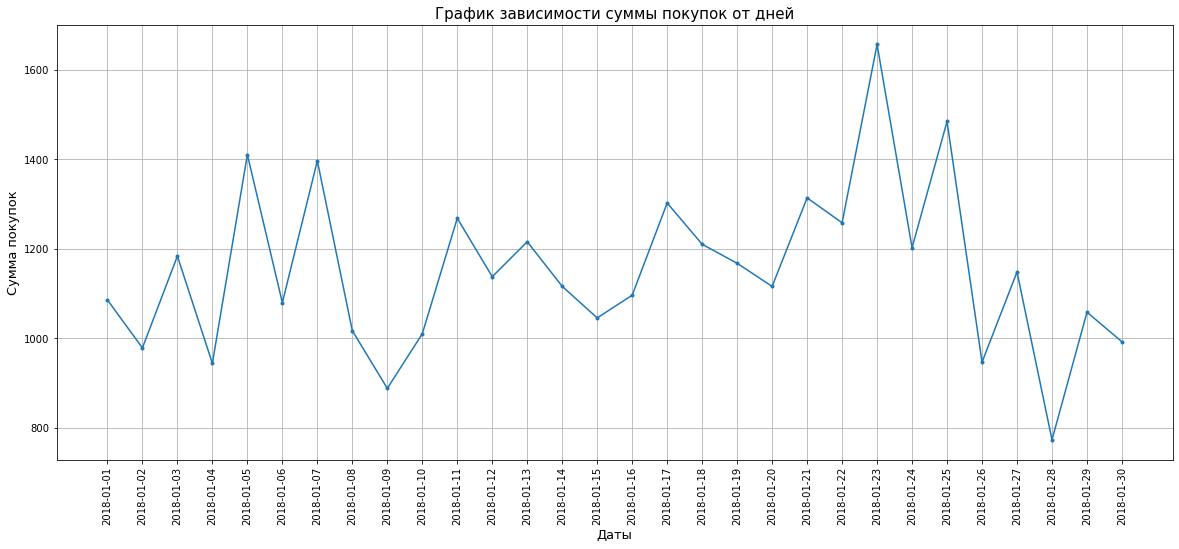

In [140]:

fig, ax = plt.subplots(figsize = (20, 8))

ax.plot(df.groupby(['date'])['new_price'].sum(), marker = '.')
ax.set_xticks(np.arange(len(df.groupby('date'))))
ax.set_xticklabels(np.array(df.groupby('date').size().keys()), rotation = "vertical")
ax.set_xlabel('Даты', fontsize = 13)
ax.set_ylabel('Сумма покупок', fontsize = 13)
ax.set_title('График зависимости суммы покупок от дней', fontsize = 15)
ax.grid()

### 3. [1 балл] Постройте график средних сумм покупок по дням недели (bar plot).

In [141]:
from datetime import datetime

df_new = df.copy(deep=True)
df_new['date'] = df_new['date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))
df_new['day'] = df_new['date'].dt.day_name()

Text(0.5, 1.0, 'График средних сумм покупок по дням недели')

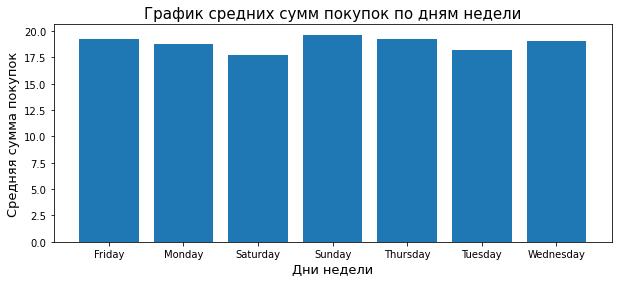

In [142]:
g3 = dict(df_new.groupby(['day', 'order_id'])['new_price'].sum().groupby('day').mean())
fig, ax = plt.subplots(figsize = (10, 4))

ax.bar(g3.keys(), g3.values())
ax.set_xlabel('Дни недели', fontsize = 13)
ax.set_ylabel('Средняя сумма покупок', fontsize = 13)
ax.set_title('График средних сумм покупок по дням недели', fontsize = 15)

### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

In [1]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.scatterplot(x = df['quantity'], y = df['new_price_for_one'], hue = df['item_name'])
ax.set_xlabel('Количество товара', fontsize = 13)
ax.set_ylabel('Цена', fontsize = 13)
ax.set_title('График зависимости денег за товар от купленного количества ', fontsize = 15)
plt.legend(bbox_to_anchor=(1, 1))
ax.grid()

NameError: name 'plt' is not defined

Сохраните график в формате pdf (так он останется векторизованным).

In [147]:
fig.savefig("Graph_hh.pdf", bbox_inches='tight', dpi=200)

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

В ходе выполнения данного домашнего задания были изучены некоторые команды, необходимые в работе с Pandas, а также построены графики на основе имеющихся данных.